<a href="https://colab.research.google.com/github/aswink71/Time-Series-Project/blob/main/Multivaiate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!pip install statsmodels

In [23]:
# importation technique to compute the information.
import numpy as nmy
#applying the library for manupulated the data-set
import pandas as pdns

# Data Visualization
import matplotlib.pyplot as matlp
# here we use the sea born libraries for draw the graph
import seaborn as sns
# use this library for this project
from statsmodels.tsa.stattools import adfuller, acf, pacf
# apply the method of that
import statsmodels.api as sm

# For cross-validation, specifically with time series data,
from sklearn.model_selection import train_test_split,TimeSeriesSplit

# Metrics to evaluate how well models perform
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# using the lyers in the algorithms
from keras.models import Sequential
# Utilize the algorithms with the lyes.
from keras.layers import Dense,Dropout

# Progress Tracking
from tqdm import tqdm

# removing the causility
import warnings
warnings.filterwarnings("ignore")

# adding this method for timing
from datetime import datetime

In [24]:
def read_data(file_path):
    data = pdns.read_csv(file_path)
    return data

In [25]:
STC_DTA=read_data('/content/drive/MyDrive/Time series project/STC 7010 Historical Data (2).csv')
MOB_DTA=read_data('/content/drive/MyDrive/Time series project/MOBILY 7020 Historical Data (2).csv')
ZAIN_DTA=read_data('/content/drive/MyDrive/Time series project/ZAIN KSA 7030 Historical Data (2).csv')

In [26]:
STC_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,37.95,37.80,37.95,37.60,1.90M,0.40%
1,11/20/2022,37.80,37.85,37.85,37.60,1.82M,0.40%
2,11/17/2022,37.65,38.00,38.05,37.65,3.20M,-0.92%
3,11/16/2022,38.00,37.80,38.00,37.15,3.44M,0.53%
4,11/15/2022,37.80,38.30,38.30,37.50,4.75M,-1.31%


In [27]:
MOB_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,35.65,35.20,35.65,34.85,540.30K,-0.56%
1,11/20/2022,35.85,36.50,36.50,35.20,385.81K,-1.65%
2,11/17/2022,36.45,35.85,36.50,35.55,459.02K,0.97%
3,11/16/2022,36.10,35.00,36.50,35.00,474.77K,3.14%
4,11/15/2022,35.00,35.80,36.00,34.95,633.20K,-2.78%


In [28]:
ZAIN_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,11.40,11.42,11.50,11.30,1.75M,-0.87%
1,11/20/2022,11.50,11.50,11.52,11.38,1.24M,-0.17%
2,11/17/2022,11.52,11.48,11.54,11.36,1.39M,0.35%
3,11/16/2022,11.48,11.34,11.52,11.24,1.98M,0.88%
4,11/15/2022,11.38,11.26,11.38,11.18,2.29M,1.25%


In [29]:
STC_DTA.shape

(1471, 7)

In [30]:
STC_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [31]:
MOB_DTA.shape

(1471, 7)

In [32]:
MOB_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [33]:
ZAIN_DTA.shape

(1469, 7)

In [34]:
ZAIN_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1469 non-null   object 
 1   Price     1469 non-null   float64
 2   Open      1469 non-null   float64
 3   High      1469 non-null   float64
 4   Low       1469 non-null   float64
 5   Vol.      1469 non-null   object 
 6   Change %  1469 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.5+ KB


In [35]:
print(STC_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [36]:
print(MOB_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [37]:
print(ZAIN_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [38]:
print("STC_DTA Duplicate Rows:", STC_DTA.duplicated().sum())

STC_DTA Duplicate Rows: 0


In [39]:
print("ZAIN_DTA Duplicate Rows:", ZAIN_DTA.duplicated().sum())

ZAIN_DTA Duplicate Rows: 0


In [40]:
print("MOB_DTA Duplicate Rows:", MOB_DTA.duplicated().sum())

MOB_DTA Duplicate Rows: 0


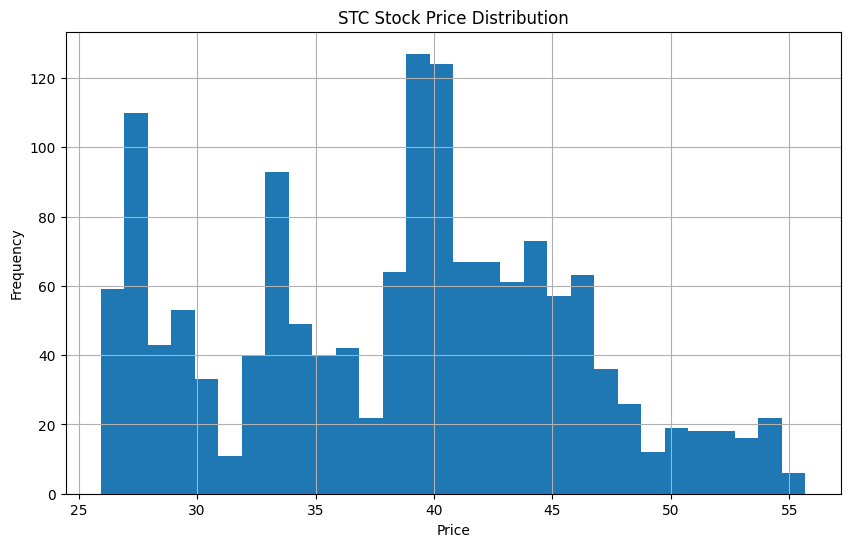

In [41]:
# Price Distribution (Histogram)
matlp.figure(figsize=(10, 6))
matlp.hist(STC_DTA['Price'], bins=30)
matlp.xlabel('Price')
matlp.ylabel('Frequency')
matlp.title('STC Stock Price Distribution')
matlp.grid(True)
matlp.show()

In [42]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.0 MB/s eta 0:00:00


In [43]:
STC_DTA['Date'] = pdns.to_datetime(STC_DTA['Date'])
MOB_DTA['Date'] = pdns.to_datetime(MOB_DTA['Date'])
ZAIN_DTA['Date'] = pdns.to_datetime(ZAIN_DTA['Date'])

In [44]:
STC_DTA = STC_DTA.set_index('Date')
MOB_DTA = MOB_DTA.set_index('Date')
ZAIN_DTA = ZAIN_DTA.set_index('Date')

In [45]:
STC_DTA.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-11-21,37.95,37.80,37.95,37.60,1.90M,0.40%
2022-11-20,37.80,37.85,37.85,37.60,1.82M,0.40%
2022-11-17,37.65,38.00,38.05,37.65,3.20M,-0.92%
2022-11-16,38.00,37.80,38.00,37.15,3.44M,0.53%
2022-11-15,37.80,38.30,38.30,37.50,4.75M,-1.31%


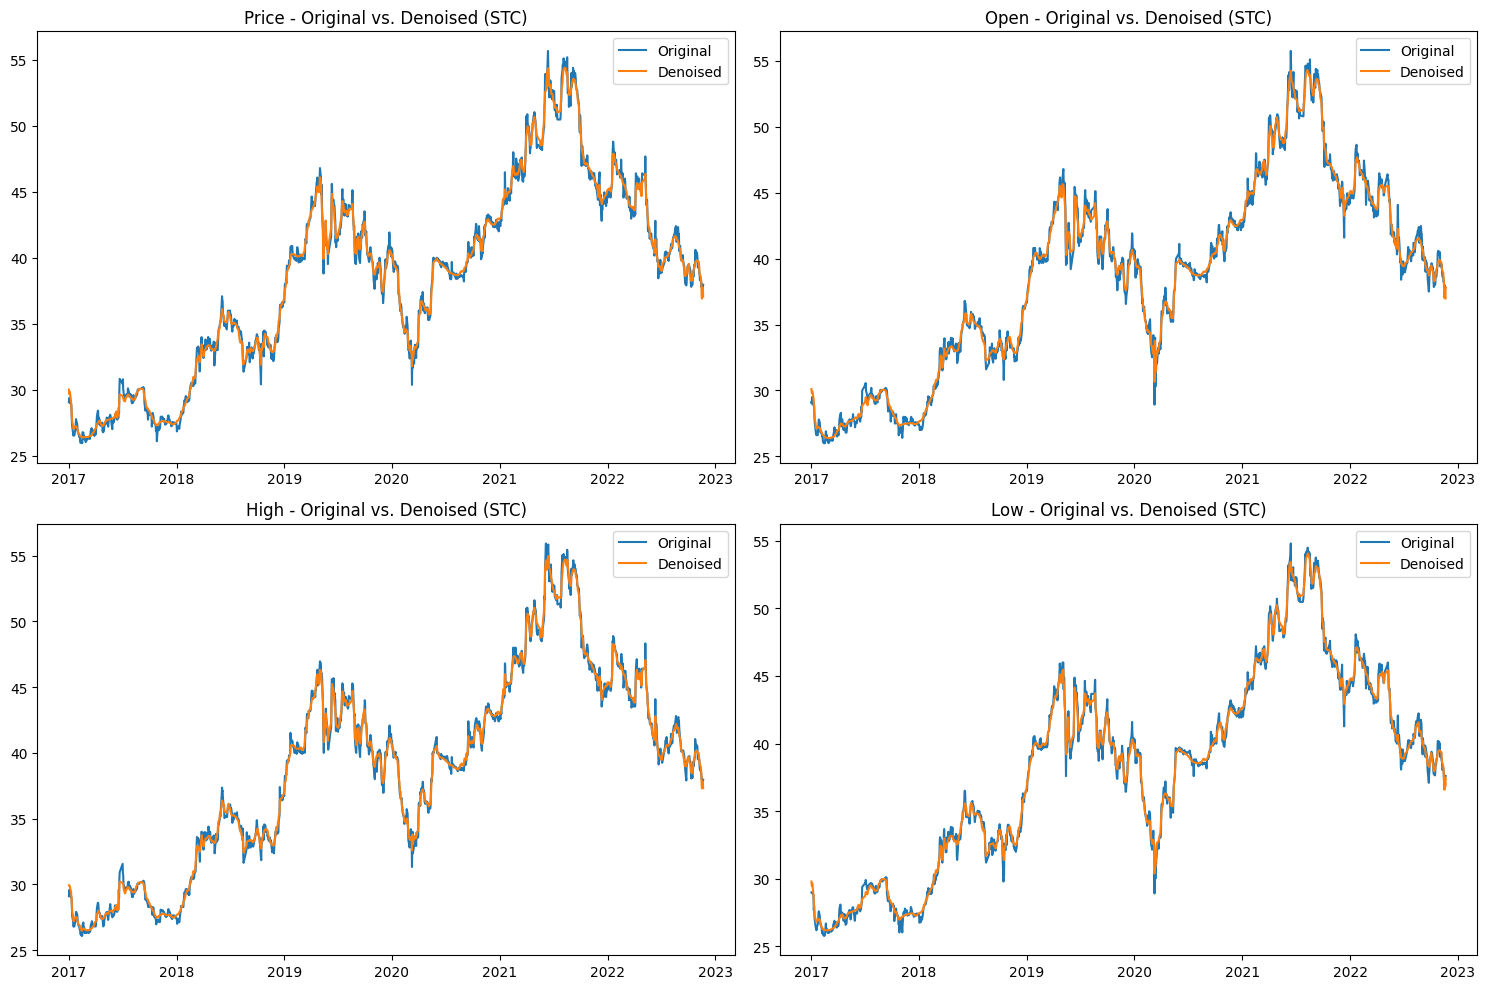

In [46]:
import pywt
# defining the method with the parameters
def wavelet_denoise(data,wavelet='db4',level=1):
    # Perform a discrete wavelet transform (DWT) on the input
    coeff=pywt.wavedec(data, wavelet, mode="per")
    # Estimate the noise standard deviation (sigma) based on the median absolute deviation
    sigma=nmy.median(nmy.abs(coeff[-level])) / 0.6745
    # Determine the denoising universal threshold (uthresh).
    uthresh=sigma * nmy.sqrt(2 * nmy.log(len(data)))
    coeff[1:]=(pywt.threshold(i, value=uthresh,mode='soft') for i in coeff[1:])
    denoised_data=pywt.waverec(coeff,wavelet,mode='per') #reconstruct

    # Ensure the length of denoised data matches the original data
    denoised_data=denoised_data[:len(data)]

    return denoised_data

columns_to_denoise=['Price', 'Open', 'High', 'Low']

for column in columns_to_denoise:
    STC_DTA[column + '_denoised'] = wavelet_denoise(STC_DTA[column])

# ploting the figuresize of the graph
matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(STC_DTA[column], label='Original')
    matlp.plot(STC_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (STC)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [47]:
STC_DTA_denoised = STC_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]
STC_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,37.053640,36.980651,37.309299,36.886020
2022-11-20,37.691529,37.841816,37.813996,37.498794
2022-11-17,36.898001,37.008325,37.305139,36.585402
2022-11-16,37.089451,37.292800,37.520129,36.726699
2022-11-15,37.991226,38.267649,38.393143,37.621042


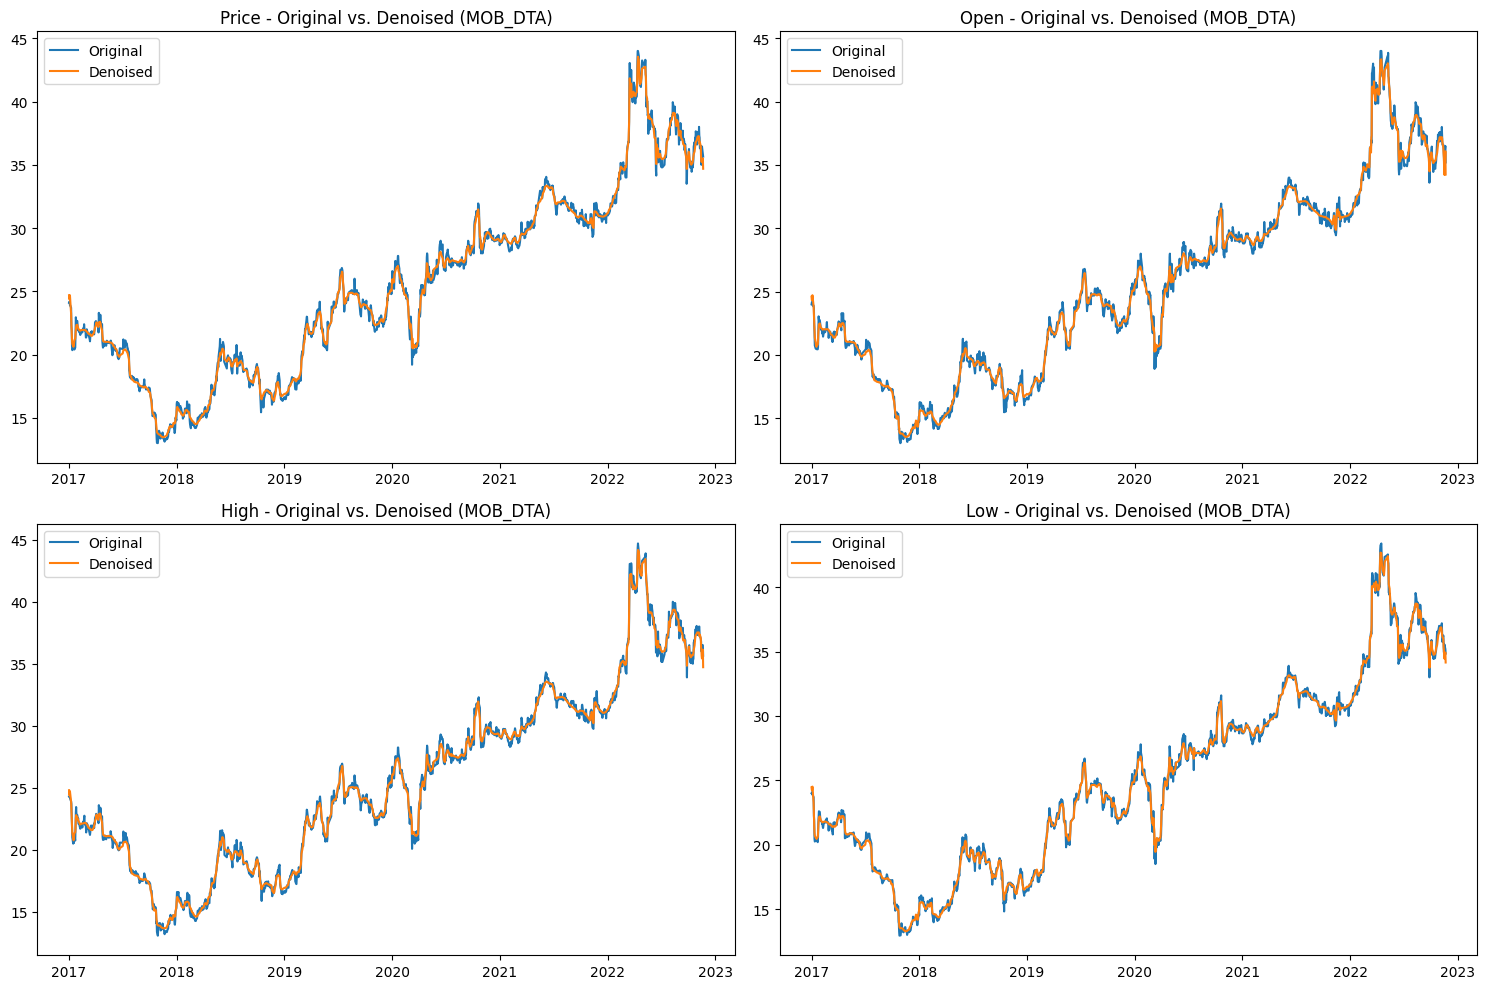

In [48]:
# Apply wavelet denoising to MOB_DTA
for column in columns_to_denoise:
    MOB_DTA[column + '_denoised'] = wavelet_denoise(MOB_DTA[column])

# Create a new DataFrame with denoised data for MOB_DTA
MOB_DTA_denoised = MOB_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]

matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(MOB_DTA[column], label='Original')
    matlp.plot(MOB_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (MOB_DTA)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [49]:
MOB_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,34.687296,34.246584,34.723126,34.154094
2022-11-20,35.508795,36.083377,36.138736,34.931463
2022-11-17,35.289232,34.215036,35.426941,34.447009
2022-11-16,35.229645,34.514306,35.626972,34.557422
2022-11-15,35.257313,35.569238,36.057010,35.111255


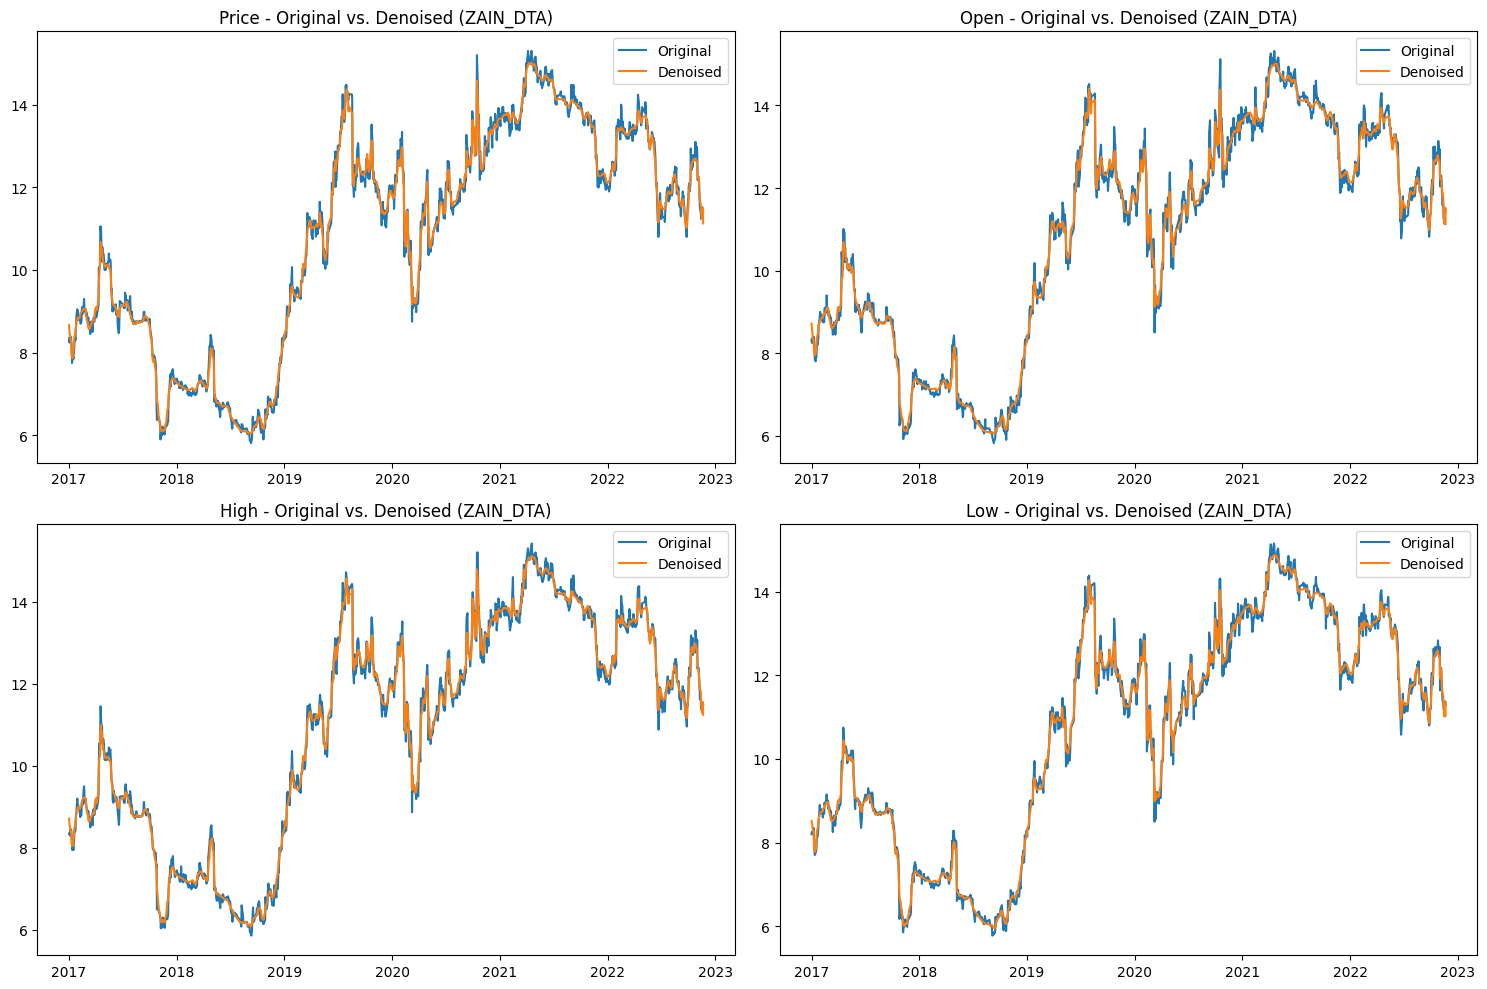

In [50]:
# Apply wavelet denoising to ZAIN_DTA
for column in columns_to_denoise:
    ZAIN_DTA[column + '_denoised'] = wavelet_denoise(ZAIN_DTA[column])

# Create a new DataFrame with denoised data for ZAIN_DTA
ZAIN_DTA_denoised = ZAIN_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]

matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(ZAIN_DTA[column], label='Original')
    matlp.plot(ZAIN_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (ZAIN_DTA)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [51]:
ZAIN_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,11.126366,11.126719,11.242727,11.032671
2022-11-20,11.506569,11.520320,11.556474,11.355438
2022-11-17,11.236368,11.127045,11.297395,11.016776
2022-11-16,11.262502,11.147668,11.323279,11.032582
2022-11-15,11.373663,11.315599,11.479557,11.203742
